In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Unemployment in India.csv')

In [4]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
data.shape

(768, 7)

In [6]:
data['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

In [7]:
data['Area'].unique()

array(['Rural', nan, 'Urban'], dtype=object)

In [8]:
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

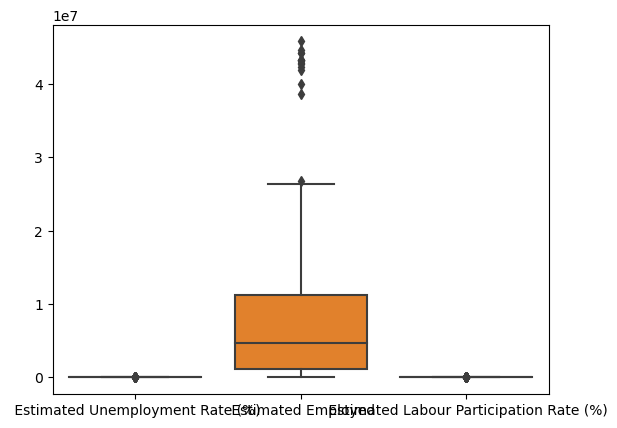

In [9]:
import seaborn as sns
sns.boxplot(data=data)
plt.show()

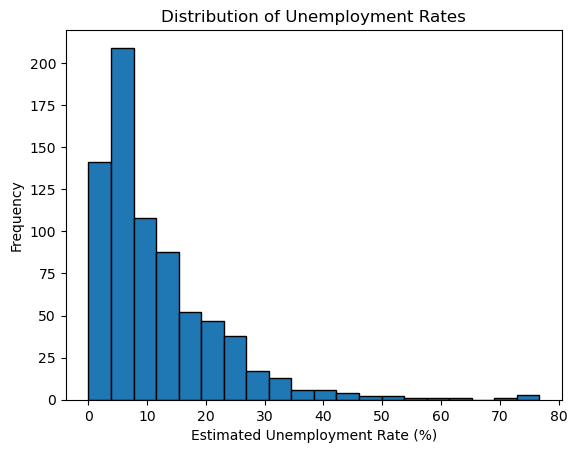

In [10]:

# Plot a histogram
plt.hist(data[' Estimated Unemployment Rate (%)'], bins=20, edgecolor='black')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Unemployment Rates')
plt.show()




In [11]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

# Display the rows containing outliers
print(data[outliers])


          Region         Date  Frequency   Estimated Unemployment Rate (%)  \
14         Assam   31-05-2019    Monthly                              4.29   
37         Bihar   30-04-2020    Monthly                             45.09   
38         Bihar   31-05-2020    Monthly                             47.26   
105      Haryana   30-04-2020    Monthly                             41.61   
106      Haryana   31-05-2020    Monthly                             34.22   
..           ...          ...        ...                               ...   
706      Tripura   31-01-2020    Monthly                             34.37   
707      Tripura   29-02-2020    Monthly                             33.88   
708      Tripura   31-03-2020    Monthly                             25.69   
709      Tripura   30-04-2020    Monthly                             34.88   
726  Uttarakhand   31-05-2019    Monthly                              9.17   

      Estimated Employed   Estimated Labour Participation Rate 

C:\Users\HP\AppData\Local\Temp\ipykernel_12116\489820983.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)




### Outliers Identified:
* In Bihar on 30-04-2020, the estimated unemployment rate is unusually high at 45.09, suggesting an outlier.
* Similarly, in Haryana on 30-04-2020, the estimated unemployment rate is 41.61, which is also above the expected range.

### data Imputation Strategy:

* Considering the presence of outliers, it is recommended to replace missing values with the median rather than the mean for a more robust central tendency estimate.
* The median is less influenced by extreme values, providing a more reliable imputation method.

In [12]:
column_to_drop = ' Frequency'
data.drop(column_to_drop, axis=1, inplace=True)

In [13]:


# One-Hot Encoding for 'Region' and 'Area', assuming 'Frequency' is already numeric
df = pd.get_dummies(data, columns=['Region', 'Area'], drop_first=True)


df.head()


,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region_Assam,Region_Bihar,Region_Chandigarh,Region_Chhattisgarh,Region_Delhi,Region_Goa,...,Region_Punjab,Region_Rajasthan,Region_Sikkim,Region_Tamil Nadu,Region_Telangana,Region_Tripura,Region_Uttar Pradesh,Region_Uttarakhand,Region_West Bengal,Area_Urban
0,31-05-2019,3.65,11999139.0,43.24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30-06-2019,3.05,11755881.0,42.05,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,31-07-2019,3.75,12086707.0,43.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,31-08-2019,3.32,12285693.0,43.97,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30-09-2019,5.17,12256762.0,44.68,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:

df_cleaned = df.dropna()





In [15]:
df_cleaned.shape

(740, 32)

In [16]:
df_cleaned.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region_Assam,Region_Bihar,Region_Chandigarh,Region_Chhattisgarh,Region_Delhi,Region_Goa,Region_Gujarat,...,Region_Punjab,Region_Rajasthan,Region_Sikkim,Region_Tamil Nadu,Region_Telangana,Region_Tripura,Region_Uttar Pradesh,Region_Uttarakhand,Region_West Bengal,Area_Urban
count,740.000000,7.400000e+02,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,11.787946,7.204460e+06,42.630122,0.035135,0.037838,0.016216,0.037838,0.037838,0.032432,0.037838,...,0.037838,0.037838,0.022973,0.037838,0.037838,0.037838,0.037838,0.036486,0.037838,0.514865
std,10.721298,8.087988e+06,8.111094,0.184246,0.190933,0.126392,0.190933,0.190933,0.177265,0.190933,...,0.190933,0.190933,0.149919,0.190933,0.190933,0.190933,0.190933,0.187624,0.190933,0.500117
min,0.000000,4.942000e+04,13.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.657500,1.190404e+06,38.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.350000,4.744178e+06,41.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,15.887500,1.127549e+07,45.505000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,76.740000,4.577751e+07,72.570000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
correlation_matrix = df_cleaned.corr()

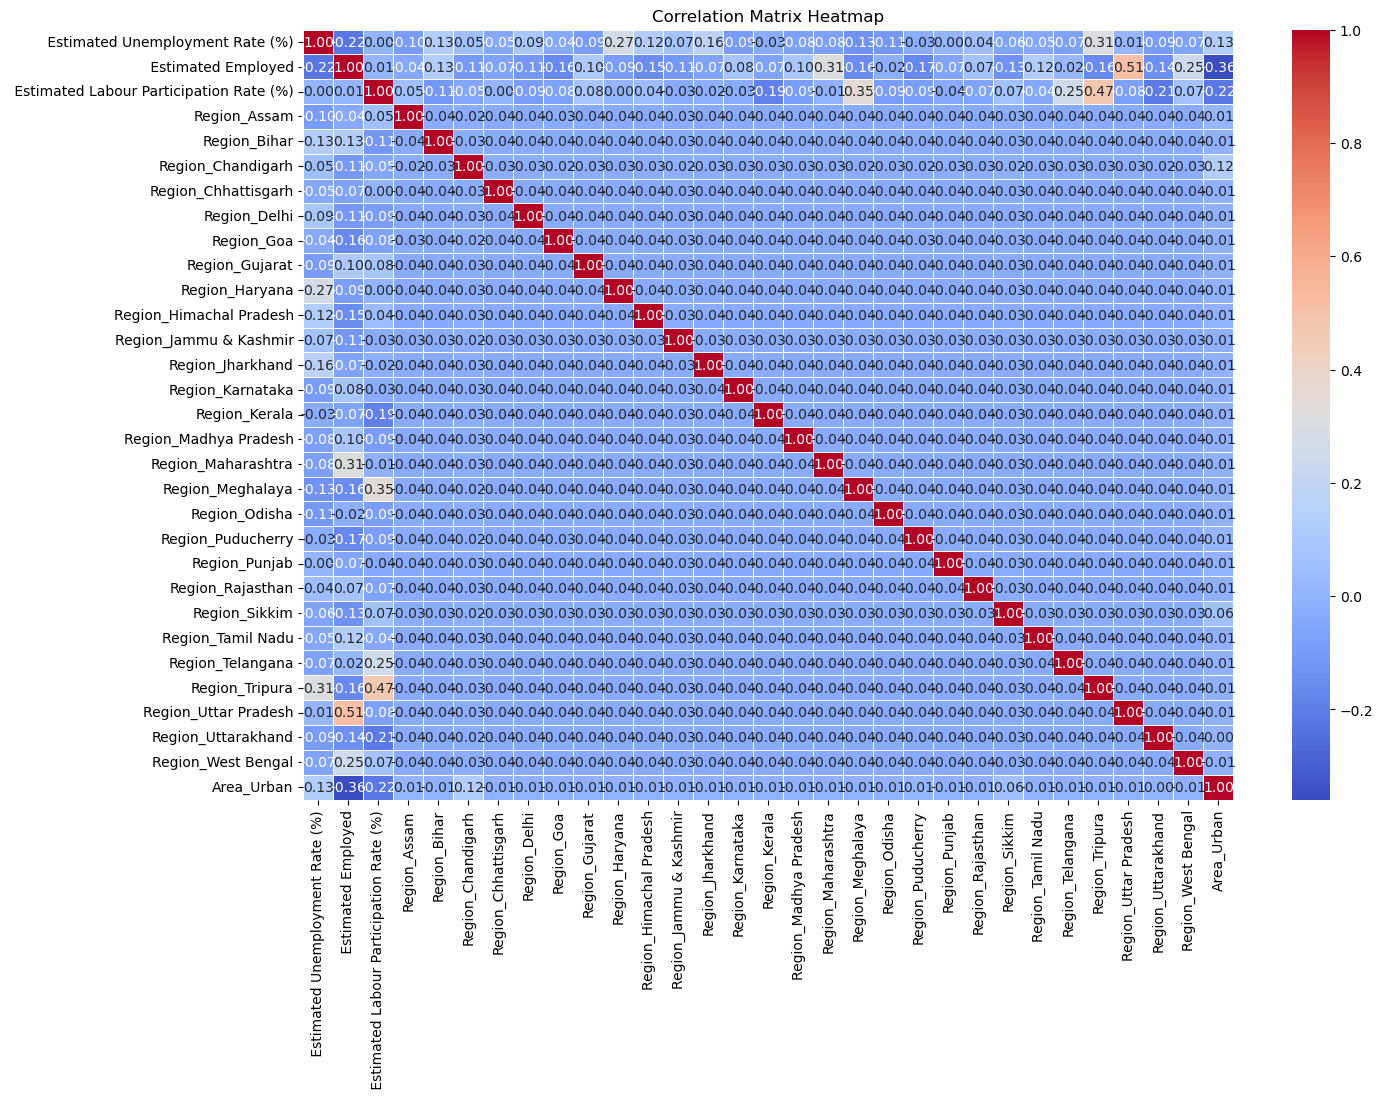

In [19]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [24]:
unemployment_corr = correlation_matrix[' Estimated Unemployment Rate (%)'].sort_values(ascending=True)

In [25]:
unemployment_corr

 Estimated Employed                        -0.222876
Region_Meghalaya                           -0.126941
Region_Odisha                              -0.113462
Region_Assam                               -0.095464
Region_Gujarat                             -0.094841
Region_Karnataka                           -0.094616
Region_Uttarakhand                         -0.094537
Region_Madhya Pradesh                      -0.081098
Region_Maharashtra                         -0.078302
Region_Telangana                           -0.074963
Region_West Bengal                         -0.067804
Region_Sikkim                              -0.064956
Region_Chhattisgarh                        -0.047154
Region_Tamil Nadu                          -0.046340
Region_Goa                                 -0.042956
Region_Kerala                              -0.030799
Region_Puducherry                          -0.028015
 Estimated Labour Participation Rate (%)    0.002558
Region_Punjab                               0.

### Negative Correlation:

* Strong negative correlation with 'Estimated Employed' (-0.22).
Moderate negative correlations with various regions, indicating lower unemployment where certain conditions prevail.

### Weak to No Correlation:

* Estimated Labour Participation Rate (%)', 'Region_Punjab', 'Region_Uttar Pradesh', and 'Region_Rajasthan' show weak or no significant correlation.

### Positive Correlations:

* Positive correlations with 'Area_Urban', 'Region_Jharkhand', 'Region_Haryana', and 'Region_Tripura', suggesting higher unemployment in urban areas and specific regions.

### Key Takeaways:

* Employment rates have a notable impact on reducing unemployment.
* Regional variations play a role in influencing unemployment rates.
* Urban areas and specific regions may exhibit higher unemployment

In [37]:
df_cleaned[' Date'] = pd.to_datetime(df_cleaned[' Date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_12116\3465944311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[' Date'] = pd.to_datetime(df_cleaned[' Date'])


In [38]:
df_cleaned['Month'] = df_cleaned[' Date'].dt.month

C:\Users\HP\AppData\Local\Temp\ipykernel_12116\2932540399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = df_cleaned[' Date'].dt.month


In [41]:
# Filter data for months 1 to 3
before_lockdown_data = df_cleaned[df_cleaned['Month'].between(1, 3)]

(nan, nan)

In [44]:
 before_lockdown_data = df_cleaned[(df_cleaned['Month'].between(1, 3)) & 
                            (df_cleaned['Region_Assam'] == 1) & 
                            (df_cleaned[' Estimated Unemployment Rate (%)'] > 20)]

In [47]:
df_cleaned.head()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region_Assam,Region_Bihar,Region_Chandigarh,Region_Chhattisgarh,Region_Delhi,Region_Goa,...,Region_Rajasthan,Region_Sikkim,Region_Tamil Nadu,Region_Telangana,Region_Tripura,Region_Uttar Pradesh,Region_Uttarakhand,Region_West Bengal,Area_Urban,Month
0,2019-05-31,3.65,11999139.0,43.24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,2019-06-30,3.05,11755881.0,42.05,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,2019-07-31,3.75,12086707.0,43.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
3,2019-08-31,3.32,12285693.0,43.97,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,2019-09-30,5.17,12256762.0,44.68,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [55]:
keep_columns = ['Month', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%', ' Area_Urban']

In [56]:
melt_columns = [col for col in df_cleaned.columns if col not in keep_columns]

In [57]:
df_melted = pd.melt(df_cleaned, id_vars=keep_columns, var_name='Region', value_name='Region_Value', value_vars=melt_columns)

KeyError: "The following 'id_vars' are not present in the DataFrame: [' Area_Urban', ' Estimated Labour Participation Rate (%']"